In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

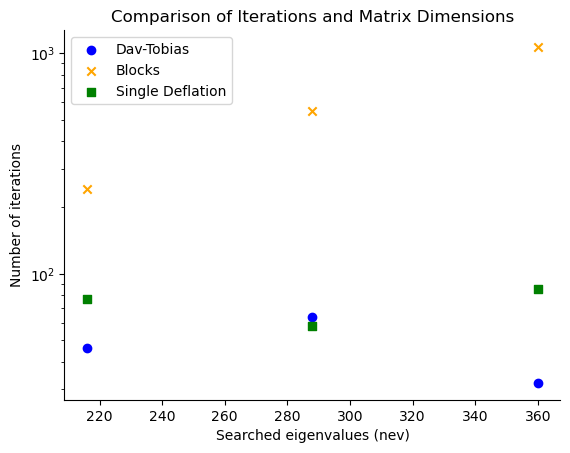

In [ ]:
dav_tobias_iterations = np.array([46, 64, 32]) # with N_aux = 3*N_low
# dav_tobias_iterations = np.array([788, 106, 610])
blocs_iterations = np.array([242, 547, 1070])
modified_defl = np.array([77, 58, 85])
N = np.array([216, 288, 360])

plt.figure()
plt.ylabel('Number of iterations')
plt.xlabel('Searched eigenvalues (nev)') 
plt.scatter(N, dav_tobias_iterations,  label='Dav-Tobias', color='blue', marker='o')
plt.yscale('log')
plt.scatter(N, blocs_iterations, label='Blocks', color='orange', marker='x')
plt.scatter(N, modified_defl, label='Single Deflation', color='green', marker='s')
plt.title('Comparison of Iterations and Matrix Dimensions')
plt.legend()
sns.despine()
plt.savefig("Computation_time.png", dpi=300, bbox_inches='tight')

Blocks: slope = 120445954775.08333, intercept = -15494868870228.0, r_value = 0.9877547635375638, p_value = 0.09972932439326498, std_err = 19024273254.67249
Single Deflation: slope = 4698147721.277778, intercept = 6624748826851.333, r_value = 0.9965822095735932, p_value = 0.05264917942809505, std_err = 389430400.0765414
Dav-Tobias: slope = 143757780328.0, intercept = 27789025453180.0, r_value = 1.0, p_value = 0.0, std_err = 0.0


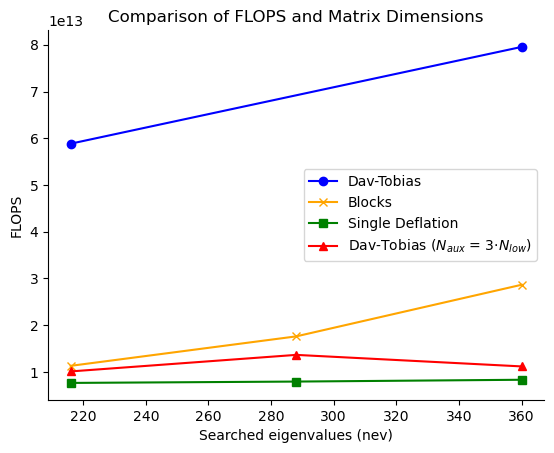

In [24]:
flops_blocks = np.array([11312281549690, 17611917727996, 28656499037302])
flops_single_defl = np.array([7655737052382, 7945438735110, 8332270324246])
flops_tobias = np.array([58840706004028, 79541826371260]) #16186594438636
flops_tobias_3 = np.array([ 10116041381116, 13654972694572, 11188249846540])

plt.figure()
plt.ylabel('FLOPS')
plt.xlabel('Searched eigenvalues (nev)')
# plt.scatter(N, flops_tobias, label='Dav-Tobias', color='blue', marker='o')
# plt.yscale('log')
plt.plot(N[[0, 2]], flops_tobias, label='Dav-Tobias', color='blue', marker='o')
plt.plot(N, flops_blocks, label='Blocks', color='orange', marker='x')
plt.plot(N, flops_single_defl, label='Single Deflation', color='green', marker='s')
plt.plot(N, flops_tobias_3, label=r'Dav-Tobias ($N_{aux}$ = 3$\cdot N_{low}$)', color='red', marker='^')
plt.title('Comparison of FLOPS and Matrix Dimensions')
plt.legend()
sns.despine()

# perform a linear fit for the FLOPS data
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(N, (flops_blocks))
print(f"Blocks: slope = {slope}, intercept = {intercept}, r_value = {r_value}, p_value = {p_value}, std_err = {std_err}")
slope, intercept, r_value, p_value, std_err = linregress(N,(flops_single_defl))
print(f"Single Deflation: slope = {slope}, intercept = {intercept}, r_value = {r_value}, p_value = {p_value}, std_err = {std_err}")
slope, intercept, r_value, p_value, std_err = linregress(N[[0, 2]], (flops_tobias))
print(f"Dav-Tobias: slope = {slope}, intercept = {intercept}, r_value = {r_value}, p_value = {p_value}, std_err = {std_err}")

plt.savefig("FLOPS.png", dpi=300, bbox_inches='tight')

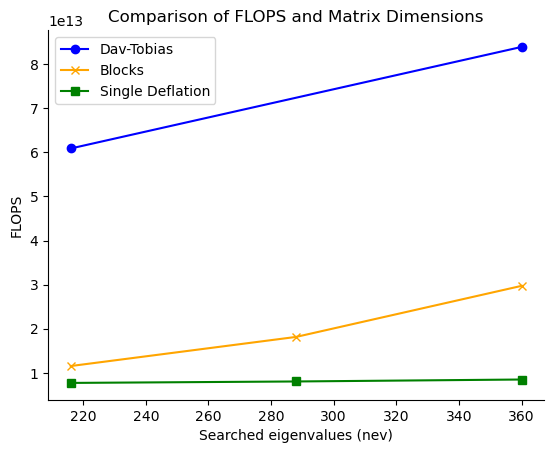

In [30]:
# improved version of the plot
flops_single = np.array([7722299436372, 8052483794255, 8494447255580])
flops_tobias = np.array([60864330787972, 16667149604812, 83886015603220])
flops_blocks = np.array([11548084964640, 18153008925903, 29725103763135])

plt.figure()
plt.ylabel('FLOPS')
plt.xlabel('Searched eigenvalues (nev)')
plt.plot(N[[0, 2]], flops_tobias[[0, 2]], label='Dav-Tobias', color='blue', marker='o')
plt.plot(N, flops_blocks, label='Blocks', color='orange', marker='x')
plt.plot(N, flops_single, label='Single Deflation', color='green', marker='s')
plt.title('Comparison of FLOPS and Matrix Dimensions')
plt.legend()
sns.despine()
